<div style="background-color:Bisque; color:Lavender; padding:30px;">

*   List item
*   List item


    
<h1 style="text-align: center; color: green;" markdown="1">Final Project Econ 320: Investigation on factors influencing labor's weekly working hours </h1>
<h2 style="text-align: center; color: purple;" markdown="1">Lanxi Liu, Mori Schacter, Will Tu, Zoey Zeng </h2>
     </div>

## Table of Contents
* [Introduction and Motivation](#anchor1)
* [Literature Review](#anchor2)
* [Data Intuition and Descriptive Statistics](#anchor3)
* [Regression Model and Results](#anchor5)
* [Conclusion and Analyzation](#anchor7)
* [Discussion and Limitation](#anchor8)

<a id='anchor1'></a>
# Introduction and Motivation

The weekly working hours of laborers in the United States serve as a critical indicator of economic productivity, work-life balance, and labor market trends. Understanding the factors that influence these working hours is essential for policymakers, employers, and economists seeking to create equitable and efficient labor policies. Variations in working hours can have far-reaching implications, such as impacting overall economic output, employee health, and regional development. Our motivation for investigating the factors influencing weekly working hours stems from the growing need to identify disparities across regions, industries, and demographics. By examining these influences, we aim to uncover patterns that can inform strategies to enhance labor equity and productivity while addressing concerns related to overwork, underemployment, and wage disparities. This study not only contributes to the broader understanding of labor dynamics but also provides actionable insights for creating a more balanced and sustainable workforce.

<img src="https://www.ctschoollaw.com/files/2017/05/DisciplineGettyImages-654187068.jpg" alt="Weekly hours of work" width="800"/>

<a id='anchor2'></a>
# Literature Review

Numerous studies have explored the interplay between diverse factors and predictors associated with weekly working hours.

The article "*Degrees to Desk: The Link Between Education and Workweek Length and Gender-based Differences*" highlights the significant impact of education on workweek length. It said "A significant proportion of individuals who have graduated with a Professional degree, approximately 40.85%, are employed in jobs that extend beyond the conventional 40-hour workweek."

<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/0*cxU_5u2Ov3Ji93Xx" alt="Education" width="500"/>

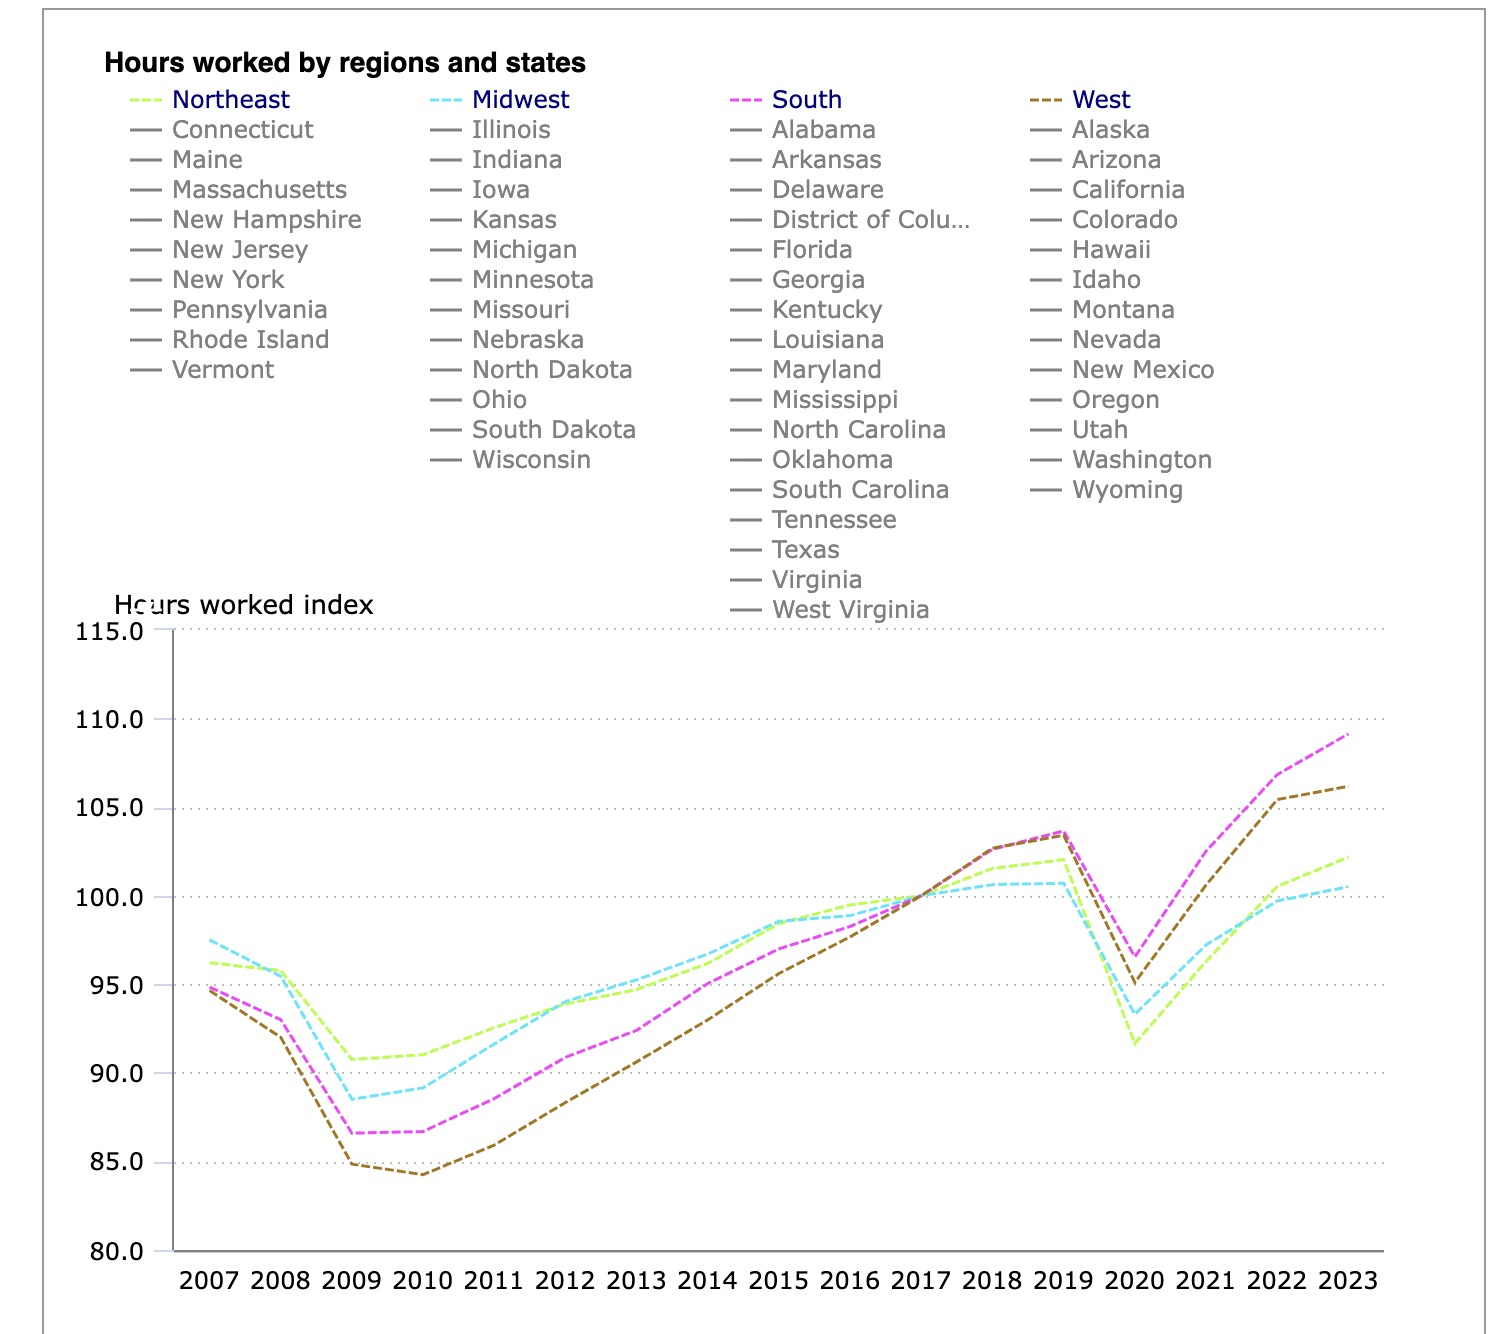


Gender disparities also persist across educational levels and age groups, with men consistently working longer hours than women, particularly during peak career years, a gap exacerbated by caregiving responsibilities. For example, in egalitarian marriages, although women spend similar hours on paid work as men, they take on more caregiving and household duties.

Working hours also vary significantly by industry, as revealed by recent BLS data on industry-specific workweeks. Employees in mining and logging industries reported the longest weekly hours, averaging 45.5 hours per week, followed closely by those in utilities and durable goods manufacturing. In contrast, leisure and hospitality workers reported the shortest average workweeks at 25.4 hours. These variations reflect differences in job demands, economic structures, and the physical or mental toll of different industries. For instance, white-collar occupations often involve extended sedentary behavior, which has been linked to decreased mental well-being, as noted in studies on sedentary behavior’s impact on life satisfaction and psychological health.

<img src="https://clockify.me/assets/images/working-hours/working-hours-by-industry-in-the-us.jpg" alt="Weekly hours of work" width="800"/>

As university students planning our future careers, these findings provide valuable insights into the complexities of the labor market. Factors such as education, gender, income, region, and industry significantly shape working hours, impacting work-life balance and career opportunities. For example, understanding how certain industries demand longer hours or exhibit gender disparities can inform our career choices and preparation. Policymakers addressing these issues can create more equitable work environments, reducing regional and industry-specific disparities and promoting workforce well-being. These insights encourage us to align our career aspirations with evolving labor market trends to thrive in a transforming economy.

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind
import statsmodels.api as sm
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML
from statsmodels.stats.outliers_influence import variance_inflation_factor


<a class='anchor' id='anchor3'></a >
# Data Intuition and Descriptive Statistics



# 1)

### Data Source:
 Our data comes form the IPUMS CPS source, which is data from the Current Population Survey, from 2022-2024. We choose this time period for easing data management, even just using these four years our dataset was over 5 million rows and 150MB. We also think that including this shortened time period is best to isolate the hangoff effects from covid- since COVID19 had a signifcant impact on hours worked excluding years 2020/2021, is best to get the most clean results.  When selecting our data- we wanted variables most relevant to working hours, so the key catagories our variables were  selected from were  demographic data and societal status. Each row in our dataset represents a specific individual in the United States.

 ###  5 w's

- Who: people in the US, who for all variables are in the universe of sampling for all our varaibles are valid, as well as not containing missing values, or unreasonable values(measured working for more hours in a week than hours in a week for example)
- When: We include data from 2022 onward to safely avoid effects from COVID 19.
- Where: USA
- Why: inlcude the variable that we believe are relevant for predicting hours worked on average per week.
- What: Variable include: 'REGION', 'AGE', 'SEX', 'RACE', 'MARITIAL STATUS', 'NUMBER OF CHILDREN', 'CITIZEN',
       'HOURS WORKED PER WEEK', 'EDUCATION LEVEL', 'INDUSTRY WORKED', 'TOTAL ANNUAL INCOME'

# 2) 
### Data Cleaning/Variable Inspection

The following table shows how the variables we downloaded were orignally encoded in the dataset. We belive that the format that these variables are encoded in are not suitable to our needs for this project, so we will clean and transform some of these variables to better be suited for this project. A  description of the variables post cleaning will appear at the end of the data section.

Original Variable Inspection-
| #  | Variable Name | Information                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
|----|---------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| 1  | Age           | Dtype: int64, gives each person's age at last birthday                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| 2  | Sex           | Dtype: int64, { 1: "male", 2: "female" }                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             |
| 3  | Race          | Dtype: int64, { 100: "White", 200: "Black", 300: "American Indian/Aleut/Eskimo", 650: "Asian or Pacific Islander", 651: "Asian only", 652: "Hawaiian/Pacific Islander only", 700: "Other (single) race, n.e.c.", 801: "White-Black", 802: "White-American Indian", 803: "White-Asian", 804: "White-Hawaiian/Pacific Islander", 805: "Black-American Indian", 806: "Black-Asian", 807: "Black-Hawaiian/Pacific Islander", 808: "American Indian-Asian", 809: "Asian-Hawaiian/Pacific Islander", 810: "White-Black-American Indian", 811: "White-Black-Asian", 812: "White-American Indian-Asian", 813: "White-Asian-Hawaiian/Pacific Islander", 814: "White-Black-American Indian-Asian", 815: "American Indian-Hawaiian/Pacific Islander", 816: "White-Black-Hawaiian/Pacific Islander", 817: "White-American Indian-Hawaiian/Pacific Islander", 818: "Black-American Indian-Asian", 819: "White-American Indian-Asian-Hawaiian/Pacific Islander", 820: "Two or three races, unspecified", 830: "Four or five races, unspecified", 999: "Blank" } |
| 4  | MARST         | Dtype: int64, { 1: "Married, spouse present", 2: "Married, spouse absent", 3: "Separated", 4: "Divorced", 5: "Widowed", 6: "Never married/single", 7: "Widowed or Divorced", 9: "NIU" }                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
| 5  | NCHILD        | Dtype: int64, { 0: "0 children present", 1: "1 child present", 2: "2 children present", 3: "3 children present", 4: "4 children present", 5: "5 children present", 6: "6 children present", 7: "7 children present", 8: "8 children present", 9: "9+ children present" }                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| 6  | UHRSWORKT     | Dtype: int64, { 997: "Hours vary", 999: "NIU" }   Typical hours worked/week across all jobs                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| 7  | EDUC          | Dtype: int64, { 0: "NIU or no schooling", 1: "NIU or blank", 2: "None or preschool", 10: "Grades 1, 2, 3, or 4", 11: "Grade 1", 12: "Grade 2", 13: "Grade 3", 14: "Grade 4", 20: "Grades 5 or 6", 21: "Grade 5", 22: "Grade 6", 30: "Grades 7 or 8", 31: "Grade 7", 32: "Grade 8", 40: "Grade 9", 50: "Grade 10", 60: "Grade 11", 70: "Grade 12", 71: "12th grade, no diploma", 72: "12th grade, diploma unclear", 73: "High school diploma or equivalent", 80: "1 year of college", 81: "Some college but no degree", 90: "2 years of college", 91: "Associate's degree, occupational/vocational program", 92: "Associate's degree, academic program", 100: "3 years of college", 110: "4 years of college", 111: "Bachelor's degree", 120: "5+ years of college", 121: "5 years of college", 122: "6+ years of college", 123: "Master's degree", 124: "Professional school degree", 125: "Doctorate degree", 999: "Missing/Unknown" }                                                                                      |
| 8  | Region        | Region code mapped to regions such as Northeast, Midwest, South, West, and Unknown; Dtype: int64                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| 9  | Citizen       | Indication of birthplace in United States or alternatives; Dtype: int64                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| 10 | INCTOT        | Hourly wage at current job; Dtype: float64                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| 11 | INDLY         | Industry last year; Dtype: int64 (2017 Census Classification Scheme)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
                                                                                                                                                                                                                                                                                                                                                                                                               

In [2]:
df=pd.read_csv("/Users/morischacter/Documents/Econ320/Lab/Data/cps_00009.csv")

In [3]:
df.info()

num_observations = df.shape[0]
print("Number of observations:", num_observations)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5130510 entries, 0 to 5130509
Data columns (total 12 columns):
 #   Column     Dtype  
---  ------     -----  
 0   YEAR       int64  
 1   REGION     int64  
 2   AGE        int64  
 3   SEX        int64  
 4   RACE       int64  
 5   MARST      int64  
 6   NCHILD     int64  
 7   CITIZEN    int64  
 8   UHRSWORKT  int64  
 9   EDUC       int64  
 10  INDLY      float64
 11  INCTOT     float64
dtypes: float64(2), int64(10)
memory usage: 469.7 MB
Number of observations: 5130510


# Data Cleaning
We notice just by inspecting the dataset, that for the Total Income column and the industry worked last year, there are many missing values, to which we have to clean. So, we want to ensure that across all rows and columns, there will be no missing values, as we need numerical values when doing regressions and various statstical tests later on. As a result, we want to figure out which columns have missing values and then for each column remove these missing values.

In [4]:
df.isna().sum() # We notice the last two columns have a very percentage of missing values that we will have to remove

YEAR               0
REGION             0
AGE                0
SEX                0
RACE               0
MARST              0
NCHILD             0
CITIZEN            0
UHRSWORKT          0
EDUC               0
INDLY        4687380
INCTOT       4687380
dtype: int64

In [5]:
df=df[(~(df["INCTOT"].isna()))&(~(df["INDLY"].isna()))].reset_index().drop(columns="index") 
# We ensure that there are no more missing values in our dataset

Besides these explicit missing values, there are many other codes and values that do not correspond to meaningful information. We want to make sure to extract and produce meaningful results. For example in the INDLY column we have values of 0 as well as for INCTOT column we have values of 9999... which clearly is not a valid income. 

In [6]:
# Cleaning total income column
print(df["INCTOT"].max(),df["INCTOT"].min()) # We should ensure 1) That we have values less than our max
# and 2) We should ensure our values are greater than zero.
df=df[(df["INCTOT"]<df["INCTOT"].max())&(df["INCTOT"]>0)]
# Further analysis, suggests there are many people in our dataset making less than 10000$ a year,
# which raises suspicisons, however there are most likely cases where this arises, so we should not filter
print(sum(df["INCTOT"]<1000))

999999999.0 -20043.0
12400


In [7]:
# Cleaning UHRSWORKT column
# As given in the IPUMS database 999 = Not in universe (NIU) for UHRSWORKT, so we will filter
df=df[df["UHRSWORKT"]!=999]
print(sum(df["UHRSWORKT"]==997)) # We also have codes that indicate 997 = Hours vary, but this is not meaninful for our analysis
df=df[df["UHRSWORKT"]!=997]
print(df["UHRSWORKT"].max())# It is not feasible to work more then 24*7=168 hours/week
df=df[df["UHRSWORKT"]<168]



12135
198


Since our analysis is designed to be useful for college graduates to understand the job market/trends, we don't want to include individuals whose work trends will not be representive of what our typical job trend/cycle will look like. Consequently, we filter for age values between 18 and 65.

In [8]:
# Cleaning Age column
df=df[(df["AGE"]>=18)&(df["AGE"]<=65)]


### Data Pre-Processing
Now that we have filtered our dataset for values that are not meaningful, we now need to transform our features/columns in a way that is more suitable for this project. This will mainly include creating various dummy variables.

We first will explore the INCTOT column and pre-process by converting the total income column into log income.

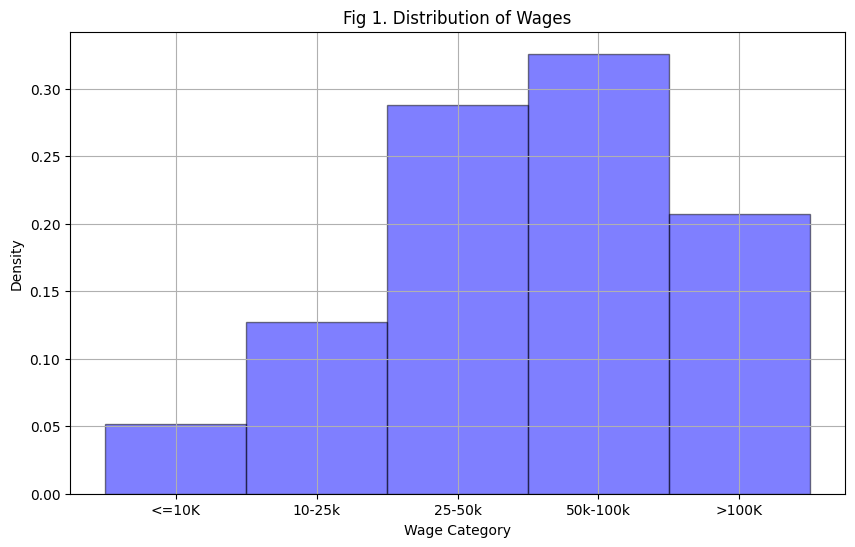

In [9]:
df["ln_INCTOT"]=(np.log(df["INCTOT"])) # Convert to log wages- a popular choice.
def convert_wage_to_category(wage):
    if wage <= 10000:
        return 0
    elif 10000 < wage <= 25000:
        return 1
    elif 25000 < wage <= 50000:
        return 2
    elif 50000 < wage <= 100000:
        return 3
    elif wage > 100000:
        return 4
    else:
        return None  

df['wage_cat'] = df['INCTOT'].apply(convert_wage_to_category)


plt.figure(figsize=(10, 6))
plt.hist(df['wage_cat'], bins=[0, 1, 2, 3, 4, 5], color='blue', alpha=0.5, edgecolor='black',density=True)
category_labels = ['<=10K', '10-25k', '25-50k', '50k-100k', '>100K']
plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5, 4.5], labels=category_labels)
plt.title('Fig 1. Distribution of Wages')
plt.xlabel('Wage Category')
plt.ylabel('Density')
plt.grid(True)
plt.show()

We notice, that transforming the total income column with a log transform here makes sense! Our data is definitely not symmetric and is quite skewed- so let us see the distrbution now being transformed. Also note, that yes, without binning the data, the Wage distribution is even more skewed. We also want to explore soon the role of the region on the wage distrbution, as certain regions like in New York have very high cost of living, so we would expect a much higher Income on average and this could give us motivation further in our work to hold region into account.

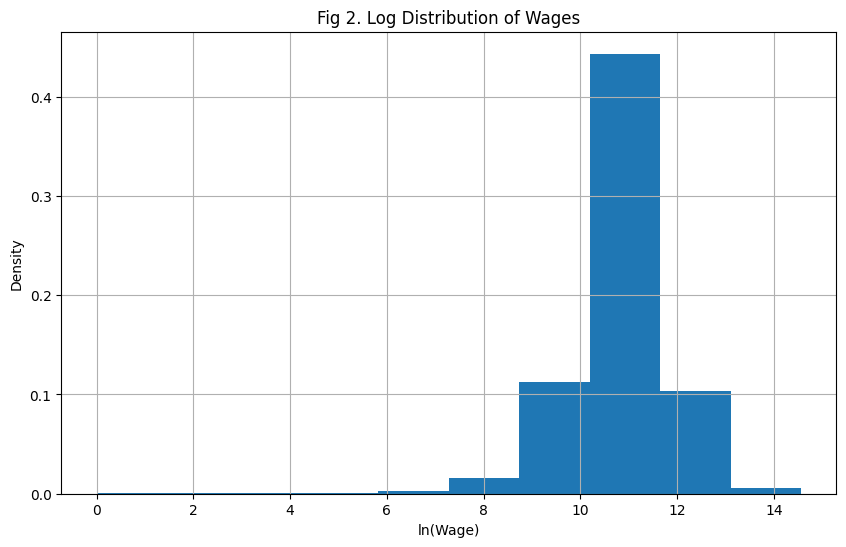

In [10]:
plt.figure(figsize=(10, 6))
plt.hist(df["ln_INCTOT"],density=True)
plt.title('Fig 2. Log Distribution of Wages')
plt.xlabel('ln(Wage)')
plt.ylabel('Density')
plt.grid(True)
plt.show()

We now observe that our distrbution of wages is much more symmetric. We also note that the range of values is much smaller allowing for more stability in our model and making it less likely for the INCTOT coefficents being significantly larger than all other variables coefficents.

We are now going to add dummy variables for Sex,Race, Married , Number of Children, and Citizen

In [11]:
df["is_white"]=df["RACE"].apply(lambda x: 1 if x==100 else 0) #We just want to focus on race via white/not white
df.drop(columns=["RACE"],inplace=True)

df["IS_MALE"] = df["SEX"].apply(lambda x: 1 if x == 1 else 0)
df.drop(columns=["SEX"],inplace=True) # Dummy variable for Sex

df["BACH_HIGHER"]=df["EDUC"].apply(lambda x: 1 if (x >= 111) & (x <= 125) else 0) 
df.drop(columns=["EDUC"],inplace=True) # Are just concerned for simplicity if an individual contains at least a college degree

df["HAVE_CHILDREN"]=df["NCHILD"].apply(lambda x: 1 if (x >0)  else 0)
df.drop(columns=["NCHILD"],inplace=True) # Are concerned if individual contains at least a single child. 

df["IS_CITIZEN"]=df["CITIZEN"].apply(lambda x: 1 if x<5 else 0 ) # Looking at IPUMBS coding codes 1-4 are citizen 5 is not
df.drop(columns=["CITIZEN"],inplace=True)

df["IS_MARRIED"]=df["MARST"].apply(lambda x: 1 if x<3 else 0 )# Looking at IPUMBS coding codes 1-2 are married else not married
df.drop(columns=["MARST"],inplace=True)


After dummy encoding, we also need to encode the region and industry variables using the IPUMBS codes.

In [12]:
def encode_regions(series):
    region_mapping = {
            11: "Northeast",
            12: "Northeast",
            21: "Midwest",
            22: "Midwest",
            31: "South",
            32: "South",
            33: "South",
            41: "West",
            42: "West",
            97: "State Unknown"
        }
# Map the numeric codes to the corresponding region names
    return series.map(region_mapping)
df["REGION"]=encode_regions(df["REGION"]) # When doing regression later on, will need to use dummy variable encoding into 3 different categories.

Now that we have encoded these regions, we should now explore the distrbution of wages conditioned on region.

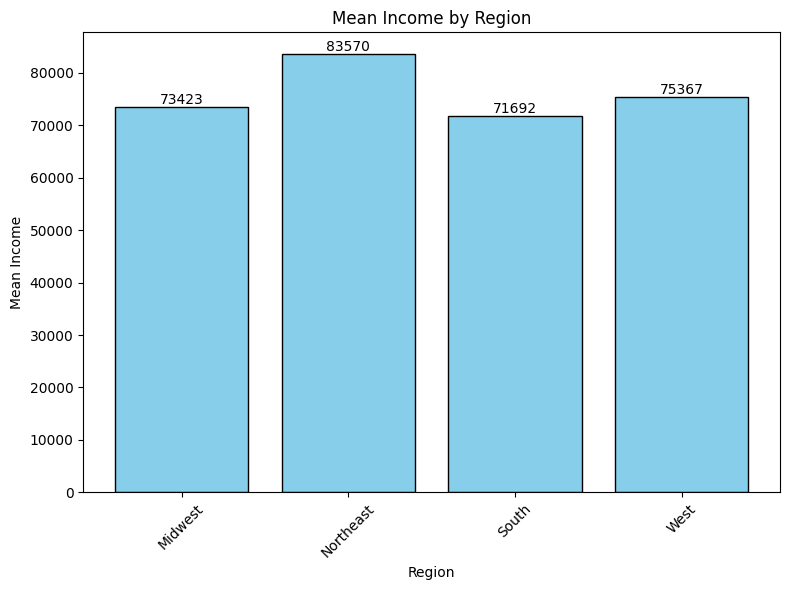

In [13]:
mean_incomes = df.groupby("REGION")["INCTOT"].mean()

plt.figure(figsize=(8, 6))
bars = plt.bar(mean_incomes.index, mean_incomes.values, color='skyblue', edgecolor='black')

# Add labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f"{height:.0f}", 
             ha='center', va='bottom', fontsize=10)

# Chart formatting
plt.title("Mean Income by Region")
plt.xlabel("Region")
plt.ylabel("Mean Income")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
   

We can see that there is clearly is a differnce for the mean income  in the Northeast region- which aligns with our intution that cities like NYC and Boston are quite expensive to live in which necessitates the need for increased income. When doing further anaylsis it may be useful to determine if this differnce is just do to noise, so we should perform some  statistical test on this data.

We will run a one sided t-test with the following assumptions:
### Hypotheses

The null and alternative hypotheses are:

$$
H_0: \mu_\text{Northeast}=text{Others}
$$

$$
H_a: \mu_\text{Northeast} > \mu_\text{Others}
$$

### t-Test Statistic

The t-test statistic is given by:

$$
t = \frac{\bar{x}_\text{Northeast} - \bar{x}_\text{Others}}{\sqrt{\frac{s_\text{Northeast}^2}{n_\text{Northeast}} + \frac{s_\text{Others}^2}{n_\text{Others}}}}
$$

Where:
- $( \bar{x}_\text{Northeast} )$: Sample mean of the Northeast region
- $( \bar{x}_\text{Others} )$: Sample mean of other regions
- $( s_\text{Northeast}^2 )$: Variance of the Northeast sample
- $( s_\text{Others}^2 )$: Variance of the other regions
- $( n_\text{Northeast} $): Sample size of the Northeast region
- $( n_\text{Others} $): Sample size of the other regions


### p-Value for One-Sided Test

For the one-sided test, the p-value is:

$$
\text{One-sided p-value} = \frac{\text{two-sided p-value}}{2}
$$



In [14]:
northeast_data = df[df["REGION"] == "Northeast"]["INCTOT"]
other_data = df[df["REGION"] != "Northeast"]["INCTOT"]

# Perform a two-sample t-test
t_stat, p_value = ttest_ind(northeast_data, other_data, equal_var=False)  # Welch's t-test for unequal variances

# Adjust p-value for one-sided test
p_value_one_sided = p_value / 2
print(f"The P-Value is {p_value_one_sided}")

The P-Value is 7.164416156543567e-59


Conclusion: There is clearly a large statistical differnce in means between the Northeast region and the other regions. This may be important later to account for further in our work.

In [15]:
# Define a mapping of codes to the 11 categories
print(len(df["INDLY"].unique())) # This is a hard/tedious problem since there are 264 different industries and we need to map to a more condensed space
# We figured out these key mappings from Standard Industrial Classification (SIC) codes and North American Industry Classification System (NAICS)
def map_industry_code(code):
    """
    Maps an industry code to one of the 11 categories using if statements.
    :param code: Industry code (int)
    :return: Category name (str)
    """
    if code in [170, 180, 190, 270, 280, 290, 370, 380, 390, 470, 490]:
        return "Agriculture, Forestry, Fishing, and Mining"
    elif code in [
        1070, 1080, 1090, 1170, 1180, 1190, 1270, 1280, 1290, 1370, 1390,
        1470, 1480, 1490, 1570, 1590, 1670, 1691, 1770, 1790, 1870, 1880,
        1890, 1990, 2070, 2090, 2170, 2180, 2190, 2270, 2280, 2290, 2370,
        2380, 2390, 2470, 2480, 2490, 2570, 2590, 2670, 2680, 2690, 2770,
        2780, 2790, 2870, 2880, 2890, 2970, 2980, 2990, 3070, 3080, 3095,
        3170, 3180, 3291, 3365, 3370, 3380, 3390, 3470, 3490, 3570, 3580,
        3590, 3670, 3680, 3690, 3770, 3780, 3790, 3875, 3895, 3960, 3970,
        3980, 3990
    ]:
        return "Manufacturing"
    elif code in [770]:
        return "Construction"
    elif code in [
        570, 580, 590, 670, 680, 690, 6070, 6080, 6090, 6170, 6180, 6190, 6270,
        6280, 6290, 6370, 6380, 6390
    ]:
        return "Utilities and Transportation"
    elif code in [
        4070, 4080, 4090, 4170, 4180, 4195, 4265, 4270, 4280, 4290, 4370, 4380,
        4390, 4470, 4480, 4490, 4560, 4570, 4580, 4585, 4590, 4670, 4680, 4690,
        4770, 4780, 4795, 4870, 4880, 4890, 4971, 4972, 4980, 4990, 5070, 5080,
        5090, 5170, 5180, 5190, 5275, 5280, 5295, 5370, 5381, 5391, 5470, 5480,
        5490, 5570, 5580, 5593, 5670, 5680, 5690, 5790
    ]:
        return "Wholesale and Retail Trade"
    elif code in [6870, 6880, 6890, 6970, 6991, 6992, 7071, 7072, 7080, 7181, 7190]:
        return "Finance, Insurance, and Real Estate"
    elif code in [
        7270, 7280, 7290, 7370, 7380, 7390, 7460, 7470, 7480, 7490, 7570, 7580, 7590
    ]:
        return "Professional, Scientific, and Technical Services"
    elif code in [
        7970, 7980, 7990, 8070, 8080, 8090, 8170, 8180, 8191, 8192, 8270, 8290,
        8370, 8380, 8390, 8470
    ]:
        return "Healthcare and Social Assistance"
    elif code in [7860, 7870, 7880, 7890]:
        return "Education and Training"
    elif code in [
        8561, 8562, 8563, 8564, 8570, 8580, 8590, 8660, 8670, 8680, 8690
    ]:
        return "Arts, Entertainment, and Hospitality"
    elif code in [9370, 9380, 9390, 9470, 9480, 9490, 9570, 9590, 9890]:
        return "Public Administration and Armed Forces"
    else:
        return "Unknown"

df["INDLY"]=df[df["INDLY"]!=0]["INDLY"].apply(map_industry_code)
df=df[df["INDLY"]!="Unknown"] # Some industries were too ambigious too apply to a specific industry/ not that many dropped values
df=df[~df["INDLY"].isna()]

264


#### Data Comprehension & Visualization
Before we provide our beliefs about the sign of our coefficents, let us explore the data a bit more!

### a. IS_MARRIED
What is interesting is there are many confounding factors at play (perhaps this varies by gender- even opposite signs!), so we will explore this later, or even it could be the fact that those are married are older(higher age), which is truly what is having the effect on work hours.
However, for now let us just gain a high level understanding of the differences between those that are and aren't married.


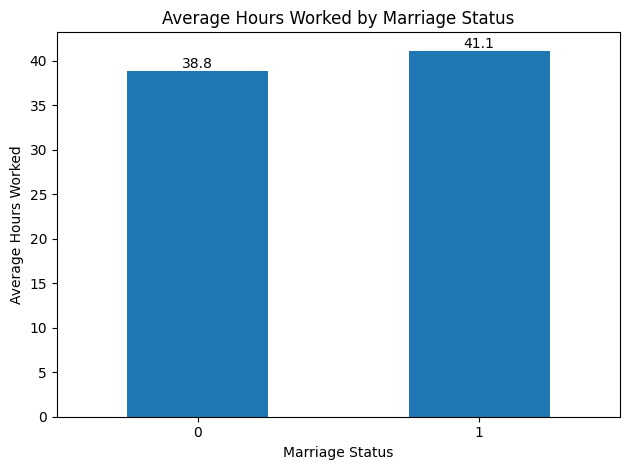

<Figure size 1000x600 with 0 Axes>

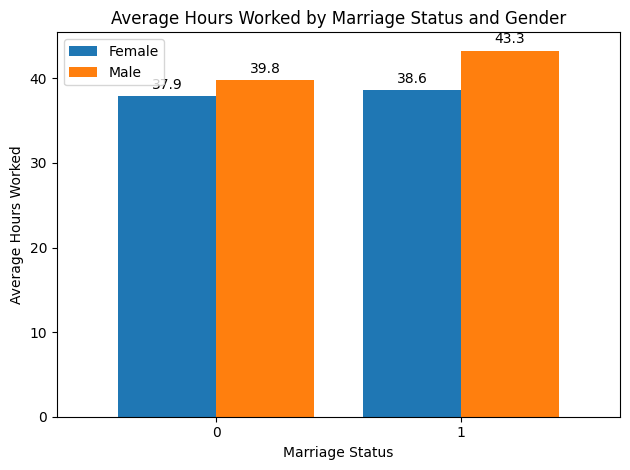

<Figure size 1200x700 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

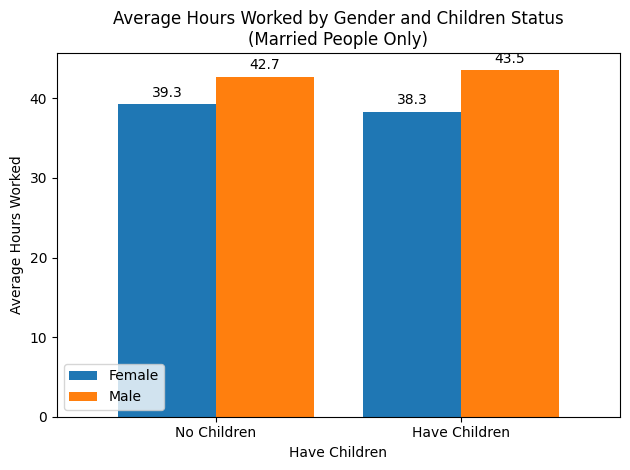

In [16]:
ax = df.groupby("IS_MARRIED")["UHRSWORKT"].mean().plot(kind='bar')

# Customize the plot
plt.title('Average Hours Worked by Marriage Status')
plt.xlabel('Marriage Status')
plt.ylabel('Average Hours Worked')

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Add value labels on top of each bar
for i, v in enumerate(df.groupby("IS_MARRIED")["UHRSWORKT"].mean()):
    ax.text(i, v, f'{v:.1f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Create figure with larger size for better readability
plt.figure(figsize=(10, 6))

# Calculate means for both groups
grouped_means = df.groupby(['IS_MARRIED', 'IS_MALE'])['UHRSWORKT'].mean().unstack()

# Create the grouped bar plot
ax = grouped_means.plot(kind='bar', width=0.8)

# Customize the plot
plt.title('Average Hours Worked by Marriage Status and Gender')
plt.xlabel('Marriage Status')
plt.ylabel('Average Hours Worked')
plt.legend(['Female', 'Male'])  # IS_MALE 0=Female, 1=Male

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Add value labels on top of each bar
for i in ax.containers:
    ax.bar_label(i, fmt='%.1f', padding=3)

plt.tight_layout()
plt.show()


# Create figure with larger size to accommodate more bars
plt.figure(figsize=(12, 7))

# Create figure
plt.figure(figsize=(10, 6))

# Filter for only married people (IS_MARRIED == 1)
married_df = df[df['IS_MARRIED'] == 1]

# Calculate means for married people grouped by children and gender
married_means = married_df.groupby(['HAVE_CHILDREN', 'IS_MALE'])['UHRSWORKT'].mean().unstack()

# Create the bar plot
ax = married_means.plot(kind='bar', width=0.8)

# Customize the plot
plt.title('Average Hours Worked by Gender and Children Status\n(Married People Only)')
plt.xlabel('Have Children')
plt.ylabel('Average Hours Worked')
plt.legend(['Female', 'Male'])

# Set x-axis labels
plt.xticks(rotation=0)
ax.set_xticklabels(['No Children', 'Have Children'])

# Add value labels on top of each bar
for i in ax.containers:
    ax.bar_label(i, fmt='%.1f', padding=3)

plt.tight_layout()
plt.show()

We can see that just simply looking at the mean differences it appears those that are married work more hours. Even breaking it down by gender, it appears that for both genders this holds true. However, when we break down by having any children then we see that married women work slighly less.

#### Relating this to what is found in the Lit.
1) "It could be that men who work more are more likely to get married." We see that males that are married indeed work much more than those not-married.
2) "If you look at the raw data, married men tend to work 20 to 30 percent more hours than single men"- Our data aligns with the direction, but is signicantly smaller(only 9%)

3) "There's been a number of studies documenting that, for example, married women — and in particular married women with children — tend to work less than unmarried women." We see that the later half of this statement our data agrees with and not the first half. The rationale is that as the family size increases, due to traditional gender roles, women tend to more time in domestic duties.

### B. BACH_HIGHER



I think there is no clear intution about the direction of having more education can have on hours worked. One can argue that being more specialized might mean your skills are in more demand so perhaps you can work less because you are being compensated very handsomely, where those without specialized skills need to work more due to their lack of specialization. On the other hand, one could argue many jobs requiring a college degree, such as managerial, technical, or professional roles, demand extended working hours. 

There is empirical evidence in the literature, however, that it tends to skew that those with more education tend to work more hours- termed the college hours premium.

<Figure size 1000x600 with 0 Axes>

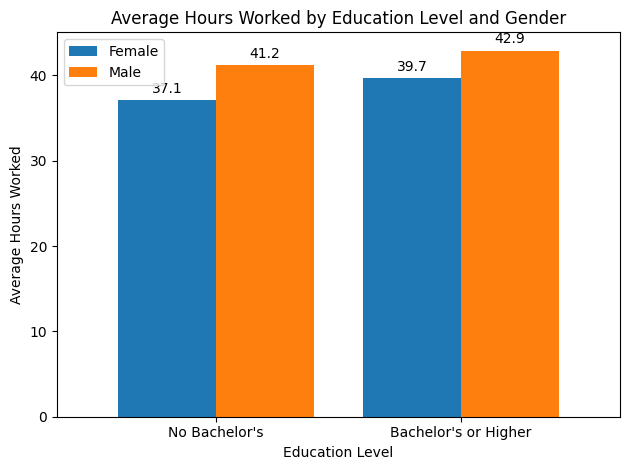

In [17]:
# Create figure with larger size for better readability
plt.figure(figsize=(10, 6))

# Calculate means for both education and gender
grouped_means = df.groupby(['BACH_HIGHER', 'IS_MALE'])['UHRSWORKT'].mean().unstack()

# Create the grouped bar plot
ax = grouped_means.plot(kind='bar', width=0.8)

# Customize the plot
plt.title('Average Hours Worked by Education Level and Gender')
plt.xlabel('Education Level')
plt.ylabel('Average Hours Worked')
plt.legend(['Female', 'Male'])

# Set x-axis labels
plt.xticks(rotation=0)
ax.set_xticklabels(['No Bachelor\'s', 'Bachelor\'s or Higher'])

# Add value labels on top of each bar
for i in ax.containers:
   ax.bar_label(i, fmt='%.1f', padding=3)

plt.tight_layout()
plt.show()

We see that our data is indeed aligned with the previous literature on this topic- that those with more education tend to work more hours.

### C. Industry
We want to explore the average working hours across the industry in our dataset.

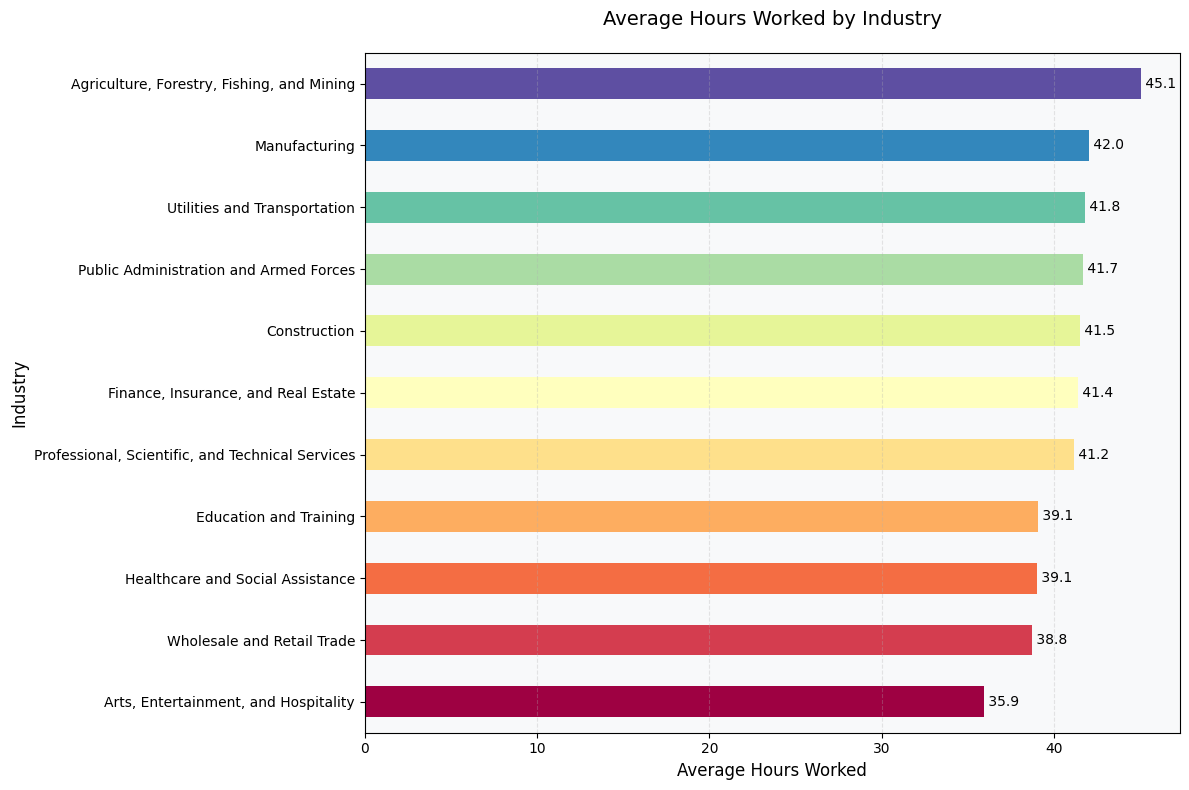

In [18]:
# Create figure with larger size for readability
plt.figure(figsize=(12, 8))

# Create horizontal bar plot
industries_hours = df.groupby("INDLY")["UHRSWORKT"].mean()

# Sort values from highest to lowest
industries_hours_sorted = industries_hours.sort_values(ascending=True)

# Create colormap - using a colorful palette
colors = plt.cm.Spectral(np.linspace(0, 1, len(industries_hours_sorted)))

# Create the horizontal bar plot with colors
ax = industries_hours_sorted.plot(kind='barh', color=colors)

# Customize the plot
plt.title('Average Hours Worked by Industry', fontsize=14, pad=20)
plt.xlabel('Average Hours Worked', fontsize=12)
plt.ylabel('Industry', fontsize=12)

# Add value labels at the end of each bar
for i, v in enumerate(industries_hours_sorted):
   ax.text(v, i, f' {v:.1f}', va='center')

# Add a light grid for better readability
ax.grid(axis='x', linestyle='--', alpha=0.3)

# Change background color to make colors pop more
ax.set_facecolor('#f8f9fa')

plt.tight_layout()
plt.show()

We can see that for most of the industries the average hours is around 40. However, for the Arts and Agriculture there is significant deviations from this 40 hour average. We can hypothesize that for Arts, Entertainment, and Hospitality this is due to a  High proportion of part-time work due to variable demand (e.g., restaurants, theaters having peak and off-peak hours). For  Agriculture, Forestry, Fishing, and Mining: the Nature of the work demands long continuous shifts (can't easily stop mid-task). The two highest categories are consistent with our literature review as well, with slighly different numbers numbers due to the differences in actual categories selected.

### D. Age
In the literature, it has been disucssed that the effect of age on hours worked is that the relationship follows an inverted U-shaped curve over the course of a worker’s life. So in their early career they start to work more and more, until they get to a point where they get to their late career and start to transition into part-time roles or flexible schedules before full retirement. https://docs.iza.org/dp4765.pdf 

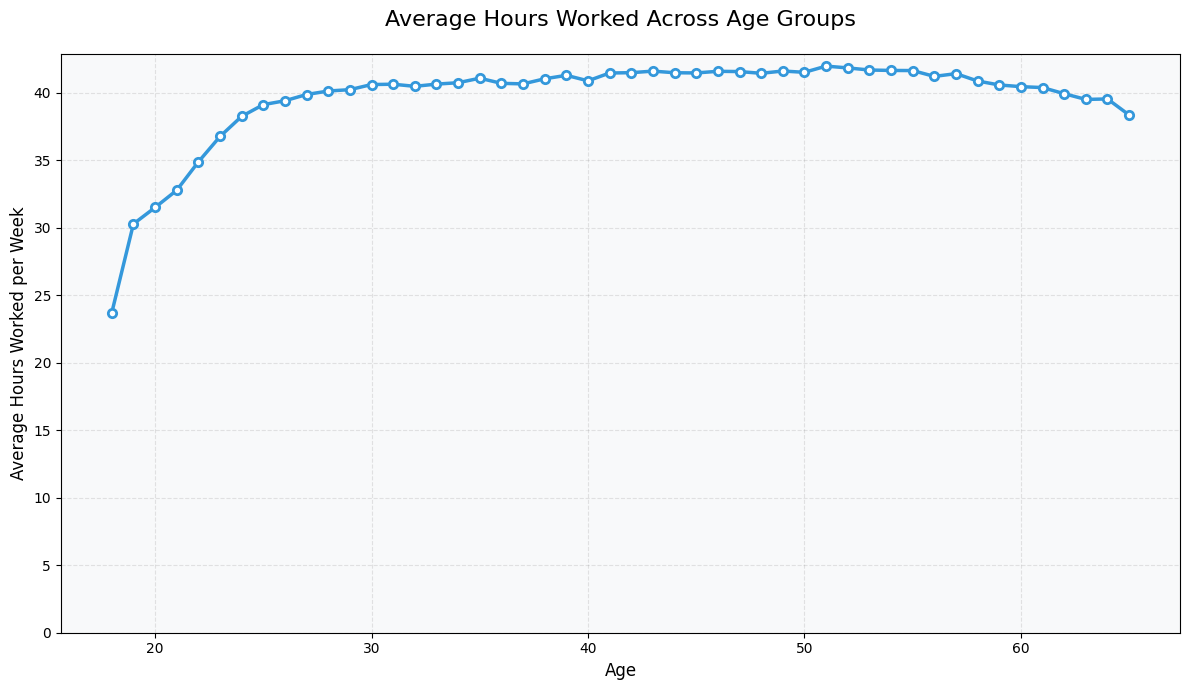

In [19]:
# Create figure with nice size
plt.figure(figsize=(12, 7))

# Get the data
age_hours = df.groupby("AGE")["UHRSWORKT"].mean()

# Create the line plot
plt.plot(np.arange(18,66), age_hours.values, 
        linewidth=2.5,                      # Thicker line
        marker='o',                         # Add markers
        markersize=6,                       # Larger markers
        color='#3498db',                    # Nice blue color
        markerfacecolor='white',            # White marker fill
        markeredgecolor='#3498db',          # Blue marker edge
        markeredgewidth=2)                  # Thicker marker edge

# Customize the plot
plt.title('Average Hours Worked Across Age Groups', fontsize=16, pad=20)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Average Hours Worked per Week', fontsize=12)

# Add grid
plt.grid(True, linestyle='--', alpha=0.3, color='gray')

# Set background color
plt.gca().set_facecolor('#f8f9fa')

# Set y-axis to start from 0
plt.ylim(bottom=0)

# Customize tick parameters
plt.tick_params(axis='both', which='major', labelsize=10)

# Add a light grid for better readability
plt.grid(True, which='major', linestyle='--', alpha=0.2)

plt.tight_layout()
plt.show()

We do indeed see that our data confirms what is discussed in the literature - this inverted U-curve shape. The domain of our graph is determined by the previous filtering done in our pre-processing steps.

Here is the data description following our cleaning procedures and creation of dummy variables in addition to a intuition (sign) of the effect of each independent variable on the dependent variable of average weekly hours worked. We will actually  use these variables in our regression and analysis.


| Variable | Information | Sign of β | Intuition |
|----------|-------------|-----------|-----------|
| REGION | Geographic region | Varies | Accounts for local labor market |
| AGE | Age (18-65) | + then - | Inverted U: Experience builds, then retirement reduces hours |
| UHRSWORKT | Weekly hours worked | Dependent | Outcome variable measuring labor supply |
| INDLY | Industry category | Industry FE | Different sectors have varying standard hours |
| is_white | Race indicator | + | Historical advantages in labor market access |
| IS_MALE | Gender indicator | + | Men tend to work longer hours on average |
| BACH_HIGHER | College degree | + | Higher education linked to longer hours |
| HAVE_CHILDREN | Has Children | - for women, + for men | Gendered effects of childcare responsibilities |
| IS_CITIZEN | Citizenship status | + | Better labor market access and opportunities |
| IS_MARRIED | Marital status | + for men, - for women | Traditional household division of labor |
| ln_INCTOT  | Log total income| Small +| Higher opportunity cost of leisure, but diminishing effect due to existing wealth|

# 3) Methodology

First, we need to do dummy encoding for both the REGION and the INDUSTRY COLUMN for our testing/regression.

We can't just numerically encode these variables, as there is no inherant ordering/rank between these variables, therefore we must create seperate columns for each value.

In [20]:
region_dummies = pd.get_dummies(df['REGION'], prefix='REGION')
region_dummies = region_dummies.drop('REGION_Northeast', axis=1).astype(int)  # Explicitly drop Northeast, which means our refrence will be Northeast
df=pd.concat([df,region_dummies],axis=1) # Combine


industry_dummies = pd.get_dummies(df['INDLY'], prefix='INDLY') 
industry_dummies = industry_dummies.drop('INDLY_Education and Training', axis=1).astype(int) # Make refrence Cat  Education and Training 
df=pd.concat([df,industry_dummies],axis=1) # Combine

df.drop(columns=["REGION","YEAR","INDLY","INCTOT","wage_cat"],inplace=True)

Initially, we want to start exploring if any of our features are significant jointly(incoporating the covariance structure and not just assuming indepedence). To do this we will start off by utilizing a F-test that will help us explore this.

 The null hypothesis (H0): All the coefficients for the predictors are equal to zero:

 $$
H_0: \beta = \vec{0} \in \mathbb{R}^{21}

$$
versus
$$
H_a: \text{At least one } \beta_i \neq 0
$$
Where $\beta$ is a vector in $\mathbb{R}^{21}$, testing whether all coefficients are jointly zero.

- The alternative hypothesis (Ha): At least one of the coefficients for the  predictors is not zero. It is represented as:

  $$
  Ha: \text{At least one } \beta_i \neq 0
  $$

We use F-test Statistics:

$$
F = \frac{R_{\text{unrestricted}}^2  - R_{\text{restricted}}^2/ \text{(q)}}{ 1 -  R_{\text{restricted}}^2 / \text{(n - k - 1)}}
$$

Where
- $q$ is the number of restriction 
- $k$ number of variable in unrestricted model


In [21]:
# Run regression
# The F-statistic in the summary tests H0: all coefficients = 0
model = sm.OLS(df["UHRSWORKT"].values, sm.add_constant(df.drop(columns=["UHRSWORKT"]))).fit()

# The F-statistic in the summary tests H0: all coefficients = 0

# Get f-value and p-value for the test
print("F-statistic:", model.fvalue)
print("P-value:", model.f_pvalue)


F-statistic: 1548.3533138406876
P-value: 0.0


Now that we have seen that we have at least one significant regressor let us explore the coefficents on our model and see the aligment with our hypothesized signs.

In [22]:
y = df['UHRSWORKT'].values
X=df.drop(columns=["UHRSWORKT"])

# Add constant
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

# Create Stargazer table
stargazer = Stargazer([model])
stargazer.title('Hours Worked Regression')
stargazer.significant_digits(3)
stargazer.show_degrees_of_freedom(False)

HTML(stargazer.render_html())

Interesting insights-

- The effect of being a ln(Income) is much higher than hypothesized. Our results suggests increasing income by 1%, increases the number of hours worked/week on average by almost 4 hours holding every other factor constant. This seems awfully large and will explore if this holds across different industires.
- Being white leads to a .143 hour decrease in hours worked, which goes against our original intution. A possible explanation could be that our original intution did not take into account that here we are fixing other variables(such as Income), so maybe holding these other variables constant, being white could lead to the advantage such as Wealth differences beyond income (inherited wealth, family resources)-leading to decreased hours worked.
- Having a bachelor degree or higher, holding everything else constant(Ceteris paribus), actually leads to an .648 decrease in average hours worked. This misalignment with our intution can be again attibuted due to the fact that here we are holding constant factors such as income and we can think that perhaps those with more advanced degrees, due to their educational training, can actually be more productive and finish their work more efficiently and faster compared to those that do not have the neccesary degrees.
- Having children, holding everything else constant, actually leads to an increase (.555) to average hours worked. Again, although very counter-intutive the key here is we are holding everything else constant. A very plausible argument is as follows: those that have already had children self-selected, meaning they were most likely above average income and could perhaps afford  support systems in place (childcare, family help), eliminating the need to spend extra hours outside of work, but as they have more children they need to maintain  a higher standard of living for family, requiring additional hours spent in the workplace.
- Being a citizen actually decreases the average hours spent working on average/week by .182 holding all other variables constant. This does not align with our intution. A plausible explanation is as follows: Non-citizens might need to work more hours to prove their value to employers as they have less job security, while citizens might have stronger social connections/network.

### Follow-up analysis of the effect  of income by industries
We want to follow-up on the surprisingly large effect of the log(Income) on the depedent variable here. We will run seperate regressions for different industries and see if this effect  holds throughout all industries.

In [23]:
# Create empty list to store models
models = []

# Get list of industries (including reference category 'Education and Training')
industry_cols = [col for col in df.columns if 'INDLY_' in col]
industries = ['Education and Training'] + [col.replace('INDLY_', '') for col in industry_cols]

income_effects = {}

# Run regression for each industry
for industry in industries:
   if industry == 'Education and Training':
       industry_data = df[df[industry_cols].sum(axis=1) == 0]
   else:
       industry_data = df[df[f'INDLY_{industry}'] == 1]
       
   y = industry_data['UHRSWORKT'].values
   X = industry_data.drop(columns=['UHRSWORKT'])
   X = sm.add_constant(X)
   model = sm.OLS(y, X).fit()
   models.append(model)
   # Store coefficient for ln_INCTOT for each industry
   income_effects[industry] = {
        model.params['ln_INCTOT']}
   
# Create list of coefficients and industry names
coef_dict = {
   'Education and Training': 5.147,
   'Agriculture, Forestry, Fishing, and Mining': 2.079,
   'Arts, Entertainment, and Hospitality': 5.088,
   'Construction': 2.711,
   'Finance, Insurance, and Real Estate': 2.790,
   'Healthcare and Social Assistance': 4.362,
   'Manufacturing': 2.623,
   'Professional, Scientific, and Technical Services': 3.283,
   'Public Administration and Armed Forces': 3.266,
   'Utilities and Transportation': 4.163,
   'Wholesale and Retail Trade': 4.646
}

stargazer = Stargazer(models)
stargazer.title('Income Effect on Hours Worked by Industry')
stargazer.custom_columns(industries, [1]*len(industries))
stargazer.significant_digits(3)
stargazer.covariate_order(['ln_INCTOT'])

# Render the table with the updated configuration

HTML(stargazer.render_html())

We can see that actually across all regions that ln(Income) has actually a very large effect on the average hourly salary. However, we do note that there are signifcant variations between industries and just visually and having an intution of our dataset via the previous EDA stage that these differences appear to be largely due to the average hours worked variable. So we want to explore the correlation/relation between average hours/industry and the strength of this coefficent variable.

In [24]:
avg_hours = {}

# For Education and Training (reference category)
education_data = df[df[[col for col in df.columns if 'INDLY_' in col]].sum(axis=1) == 0]
avg_hours['Education and Training'] = education_data['UHRSWORKT'].mean()

# For all other industries
for industry in [col.replace('INDLY_', '') for col in df.columns if 'INDLY_' in col]:
   industry_data = df[df[f'INDLY_{industry}'] == 1]
   avg_hours[industry] = industry_data['UHRSWORKT'].mean()

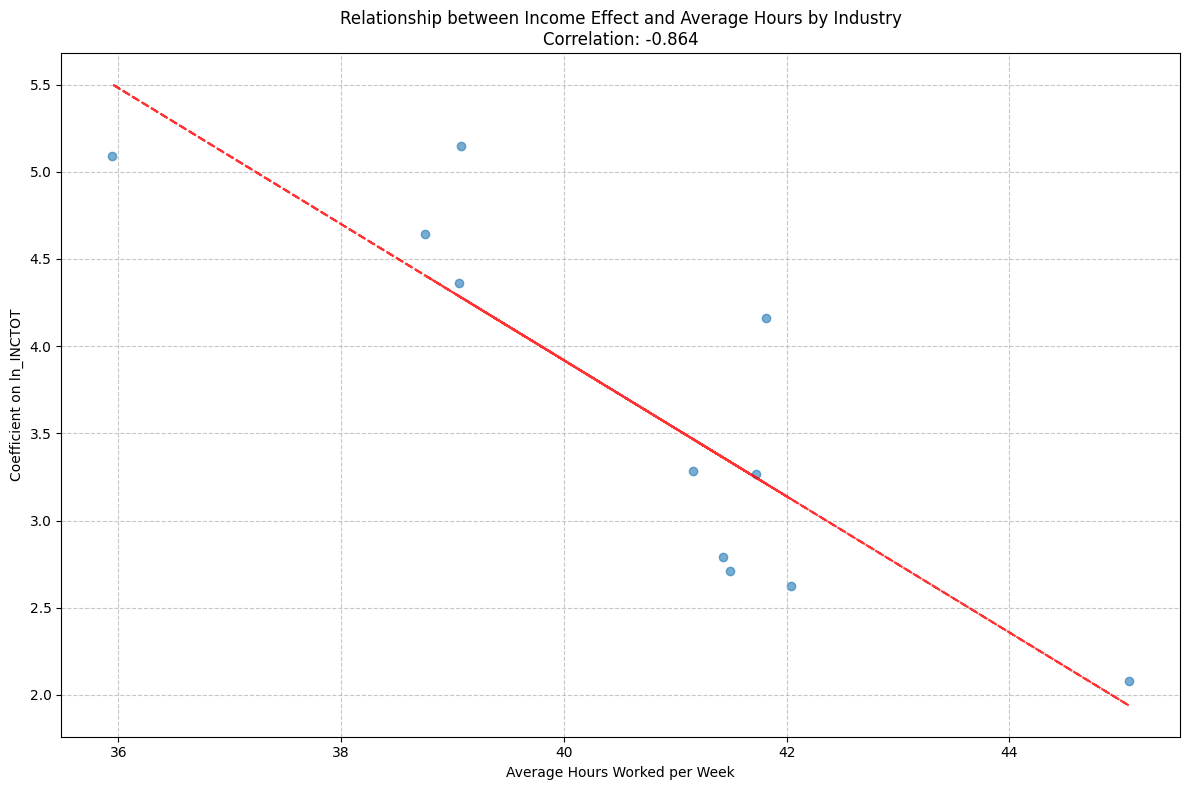

In [25]:
# Hardcode values due to coding bugs

hours_dict = {
    'Education and Training': 39.072,
    'Agriculture, Forestry, Fishing, and Mining': 45.076,
    'Arts, Entertainment, and Hospitality': 35.943,
    'Construction': 41.495,
    'Finance, Insurance, and Real Estate': 41.430,
    'Healthcare and Social Assistance': 39.056,
    'Manufacturing': 42.039,
    'Professional, Scientific, and Technical Services': 41.163,
    'Public Administration and Armed Forces': 41.723,
    'Utilities and Transportation': 41.818,
    'Wholesale and Retail Trade': 38.756
}
coefs = list(coef_dict.values())
hours = list(hours_dict.values())
industries = list(coef_dict.keys())

# Calculate correlation coefficient
correlation = np.corrcoef(hours, coefs)[0,1]
plt.figure(figsize=(12, 8))
plt.scatter(hours, coefs, alpha=0.6)

plt.xlabel('Average Hours Worked per Week')
plt.ylabel('Coefficient on ln_INCTOT')
plt.title(f'Relationship between Income Effect and Average Hours by Industry\nCorrelation: {correlation:.3f}')
plt.grid(True, linestyle='--', alpha=0.7)
z = np.polyfit(hours, coefs, 1)
p = np.poly1d(z)
plt.plot(hours, p(hours), "r--", alpha=0.8)
plt.tight_layout()
plt.show()

We can see that there is a very strong (negative) relation between the average hours worked/week and the strength of the ln(Income) coefficent. The natural explanation for this is that those who work a lot, regardless of the potential increase in salary, limited in the expansion in number of hours they can work more for. Also, as we previously saw there is a  strong relation between income and hours worked, so it is likely that those who work alot, even with more incentives, may not work more due to pre-existing wealth base, or in other words low marginal utility of income.

### Follow-up analysis on the effect of marriage for males


In [26]:
male_df = df[df['IS_MALE'] == 1]

# Subset the data to include only IS_MARRIED as the feature
y = male_df['UHRSWORKT'].values
X = pd.DataFrame({'IS_MARRIED': male_df['IS_MARRIED']})
X = sm.add_constant(X)  # Add constant for intercept

# Run regression
male_model = sm.OLS(y, X).fit()

# Generate Stargazer table
stargazer = Stargazer([male_model])
stargazer.title('Effect of Marital Status on Hours Worked (Males)')
stargazer.custom_columns(['Overall'], [1])
stargazer.significant_digits(3)
stargazer.covariate_order(['IS_MARRIED'])  # Ensures 'IS_MARRIED' appears first

# Render HTML for notebook display
HTML(stargazer.render_html())


In [27]:
# Get industry columns
industry_cols = [col for col in df.columns if 'INDLY_' in col]
industries = ['Education and Training'] + [col.replace('INDLY_', '') for col in industry_cols]

# Initialize a list to store models
models = []

# Loop through each industry
for industry in industries:
    if industry == 'Education and Training':
        # Education and Training is the reference category (all dummies 0)
        industry_data = male_df[male_df[industry_cols].sum(axis=1) == 0]
    else:
        # Filter rows where the specific industry dummy is 1
        industry_data = male_df[male_df[f'INDLY_{industry}'] == 1]

    # Subset for regression
    y = industry_data['UHRSWORKT'].values
    X = pd.DataFrame({'IS_MARRIED': industry_data['IS_MARRIED']})
    X = sm.add_constant(X)  # Add constant

    # Run regression
    model = sm.OLS(y, X).fit()
    models.append(model)

stargazer = Stargazer(models)
stargazer.title('Effect of Marital Status on Hours Worked by Industry (Males)')
stargazer.custom_columns(industries, [1] * len(industries))
stargazer.significant_digits(3)
stargazer.covariate_order(['IS_MARRIED'])  # Ensures 'IS_MARRIED' appears first

# Render HTML for notebook display
HTML(stargazer.render_html())

We observe that across all industries, being a married male significantly (
p=0.001) increases the hours spent working, holding all other variables constant. For simplicity, we focus on the differences between Construction and Arts, Entertainment, and Hospitality.
These differences can be attributed to the nature and flexibility of these industries. In Construction, many workers have fixed schedules due to project-driven timelines and site access limitations. In contrast, in Arts, Entertainment, and Hospitality, schedules are much more flexible, allowing workers to easily pick up extra shifts or choose when to work more. Additionally, Construction is a physically demanding industry, which limits the ability of workers to scale up their hours due to physical fatigue.

### Exploration of irrelevant variables and variance of standard errors

Our regression includes a significant amount of regressors, which leads to the natural risk of including variables that are truly not relevant to predicting our outcomes(hours worked). As we learned in class, irrelevant variable bias does not effect the bias, but inflates the standard errors of the coefficents, which makes it more likely for the belief that these features are significant. A key dillema, however, is that by dropping some of these variables, we can then have omitted-variable bias if this variable was actually relevant. We will use the p-value for each feature to determine whether or not the feature is actually relevant.

In [28]:
# Run initial model with all features
y = df['UHRSWORKT'].values
X_full = df.drop(columns=["UHRSWORKT"])
X_full = sm.add_constant(X_full)
model_full = sm.OLS(y, X_full).fit()

# Find significant features (p < 0.01)
significant_features = []
for feature, pvalue in model_full.pvalues.items():
   if pvalue < 0.01 and feature != 'const':  # Exclude constant
       significant_features.append(feature)

# Run model with only significant features
X_sig = df[significant_features]
X_sig = sm.add_constant(X_sig)
model_sig = sm.OLS(y, X_sig).fit()

stargazer = Stargazer([model_full, model_sig])
stargazer.title('Hours Worked Regression Comparison')
stargazer.custom_columns(['Full Model', 'Significant Features Only'], [1, 1])
stargazer.significant_digits(3)
stargazer.show_degrees_of_freedom(False)

HTML(stargazer.render_html())

We notice that for most coefficients, our standard errors decreased by 10% or more after dropping just 6 features. We chose a p-value threshold of .001 to minimize the chance of dropping relevant variables, which would lead to biased coefficients through omitted-variable bias. In future work, we plan to theoretically examine the dropped variables more thoroughly to ensure we haven't introduced bias into our estimates.

# Exploration of  Robust Standard Errors and Multicollinearity
We did not apply any robust standard errors when fitting our original model. We will now apply cov_type='HC3' standard errors and compare the effect on our old standard errors. We will also explore VIF for our variables for Multicollinearity checks.

In [30]:
y = df['UHRSWORKT'].values
X=df.drop(columns=["UHRSWORKT"])

# Add constant
X = sm.add_constant(X)

model1 = sm.OLS(y, X).fit(cov_type='HC3')

y = df['UHRSWORKT'].values
X=df.drop(columns=["UHRSWORKT"])

# Add constant
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

models = Stargazer([model, model1])
models.title('Regression on Working Hours')
models.custom_columns(['Final Model' ,'Final Model with Robust STD'], [1,1])
HTML(models.render_html())

From the comparison of the original regression model and the one using robust (White) standard errors, we observe that the coefficient estimates remain identical, as robust standard errors adjust only the variance-covariance matrix, not the estimated coefficients. In the robust model, standard errors for some variables, such as `BACH_HIGHER` and `INDLY_Agriculture`, are slightly larger, reflecting the correction for heteroskedasticity. Despite this adjustment, significance levels and overall conclusions about the key predictors remain consistent, suggesting that heteroskedasticity does not materially affect the main findings of the analysis. Adjusting for heteroskedasticity provides more reliable inference without altering the interpretation of the relationships between predictors and weekly working hours.

In [32]:
# calculate VIF :
y = df['UHRSWORKT'].values
X=df.drop(columns=["UHRSWORKT"])
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Compute and view VIF
vif = pd.DataFrame()
vif['variables'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# View results using print
vif

,variables,VIF
0,const,188.526941
1,AGE,1.192113
2,ln_INCTOT,1.434354
3,is_white,1.043430
4,IS_MALE,1.248370
5,BACH_HIGHER,1.370952
6,HAVE_CHILDREN,1.236776
7,IS_CITIZEN,1.054985
8,IS_MARRIED,1.408710
9,REGION_Midwest,1.832908


The model has minimal multicollinearity, as all predictors have VIF values below 5, indicating no severe overlap among variables. The highest VIFs are observed for regional and industry variables (around 2), but these remain within acceptable limits and are unlikely to impact the model's reliability. 

<a id='anchor7'></a>
# Conclusion and Analysis

By establishing the multiple regression model and performing several tests, we could now get a roughly clearer direction of how each different variables related to labor's weekly working hours. Demographic variables, such as age, gender, and marital status, are strongly related to our dependent variable. We fould that there is a positive relation of age and weekly working hours. This is different from our expectation but might be explaied by olders' increased responsibilities or job seniority. Moreover, the result shows that males work significantly more hours than females, highlighting the ongoing gender disparities in labor participation. Married individuals, on the other hand, are associated with fewer working hours, which may reflect a reallocation of time toward family responsibilities. For the relationship between the number of children and weekly working hours, we found that the results lie in the second scenario that individuals with children tend to work more hours, likely driven by financial pressures associated with raising a family. Education level also plays a role, with those holding a bachelor’s degree or higher working fewer hours, potentially due to better-paying jobs that offer more flexibility. Additionally, the logarithm of total income (ln_INCTOT) shows a strong positive relationship with working hours, suggesting that higher earners often hold demanding positions that require additional time investment. Significant differences in working hours are also observed across industries and regions. Industries like agriculture, construction, and utilities report longer working hours, likely due to their labor-intensive nature, while arts, entertainment, and professional services are associated with shorter hours. Regional variations further reveal that individuals in the South and Midwest tend to work more hours, possibly due to economic or cultural differences. Finally, race and citizenship status show subtle but significant effects, with non-citizens and non-white individuals working fewer hours, potentially reflecting structural barriers in access to employment opportunities.

<a id='anchor8'></a>
# Discussion and Limitation

The multiple regression model has interpretability that makes it a practical tool for examining how various factors independently influence working hours. By including a broad range of variables such as demographic, industry, and regional factors, the model provides a comprehensive analysis of the research question. The quantification of effects through regression coefficients is particularly useful for policymakers and stakeholders seeking to understand the magnitude of influence each factor holds.

However, the model also has notable limitations. It assumes linear relationships between predictors and the dependent variable, which may oversimplify complex interactions. Furthermore, the analysis is constrained by unobserved variables such as health status, job satisfaction, commute time, and workplace flexibility, all of which likely play significant roles in determining working hours. The potential for endogeneity, particularly with variables like income, complicates causal interpretations of the findings. Additionally, the cross-sectional nature of the data limits the ability to analyze temporal trends or causation. Addressing these limitations would significantly enhance the robustness of the results and provide deeper insights.

For better future improvements, different models could be used. For instance, interaction terms could be added to investigate how combinations of variables, such as gender and marital status or education and industry, affect working hours. Nonlinear models, including quadratic terms, may better capture relationships like the impact of age or income on working hours. Fixed-effects models could control for unobserved heterogeneity within industries or regions. Moreover, a longitudinal analysis could provide a dynamic perspective on how labor patterns evolve over time. Policymakers should also consider the implications of these findings. For example, the significant disparities in working hours across industries and regions suggest a need for targeted interventions to address labor market imbalances. Similarly, the positive correlation between income and working hours highlights the potential for work-life balance policies, particularly for high-demand occupations.

In a broader perspective, our findings reflect several important sociological problems in the labor force market. These suggest the importance of addressing systemic inequalities in working hours. Industries with longer working hours, such as agriculture and manufacturing, could benefit from policies promoting labor protections or workforce expansion to alleviate individual burdens. Gender disparities in working hours further highlight the need for family-friendly workplace policies and equitable caregiving support. In regions where working hours are notably high, cultural and economic interventions could address the root causes of these patterns. As labor markets continue to evolve with the integration of technology and changing societal expectations, future research should explore how these factors reshape working hours.



# References 
Works cited/ references. Full references to the works you cited in the motivation sections. At least 3 references. no specific format is needed for this.


1:
Mullens, F., & Laurijssen, I. (2024). An organizational working time reduction and its impact on three domains of mental well-being of employees: a panel study. BMC Public Health, 24(1). https://doi.org/10.1186/s12889-024-19161-x

This article provides us one important motivation for this project,whose conclusion is: "Reduced working hours have the largest and most positive impact on work-family conflict."

The study "Associations between domains of sedentary behavior and psychological well-being, satisfaction with life, and quality of life" examines how different types of sedentary behavior (SB) impact mental health outcomes. Through a cross-sectional investigation involving 584 participants, data were collected via questionnaires in November 2021. The analysis revealed that SB in various domains correlates differently with psychological well-being, life satisfaction, and quality of life.


In the context of our project, which investigates factors influencing weekly working hours, this study offers insights into how sedentary behavior, potentially linked to certain occupations or work environments, affects employees' mental health and overall life satisfaction. Understanding these associations is crucial, because prolonged sedentary behavior in the workplace may lead to decreased psychological well-being, impacting productivity and job satisfaction. Taking these findings into account can help develop strategies to mitigate the negative effects of sedentary work(which corresponds to working hours in many white-collar occupations), such as promoting regular physical activity breaks, thereby enhancing employees' quality of life and potentially influencing their working hours and productivity.
‌

2:
Chu, L. (2021). Impact of long working hours on health based on observations in China. BMC Public Health, 21(1). https://doi.org/10.1186/s12889-021-11190-0

This article provides us another motivation for aiming to understand how to control weekly working hours. "Among workers, long working hours have a negative impact on the health of workers with college degrees or beyond". We are college students about to graduate in 2 years,so we have a lot of motivation to understand more about this topic.

3: Cette, G., Drapala, S., & Lopez, J. (2023). The Circular Relationship Between Productivity and Hours Worked: A Long-Term Analysis. Comparative Economic Studies, 65(4), 650–664. https://doi.org/10.1057/s41294-023-00224-8

‌From this research, "The main results are: (i) the income channel outweighs the substitution channel in the long term: increased productivity or higher wages reduce the number of hours worked;"

 The study "The Circular Relationship Between Productivity and Hours Worked: A Long-Term Analysis" by Gilbert Cette, Simon Drapala, and Jimmy Lopez examines how productivity and wages influence working hours. It identifies two primary effects: the income effect, where higher wages lead to fewer hours worked as people prioritize leisure, and the substitution effect, where higher wages incentivize more hours due to increased opportunity costs of leisure. Their analysis of advanced economies from 1890 to 2019 concludes that the income effect dominates in the long term, resulting in reduced working hours as wages increase.

In relation to our project, this study reinforces the hypothesis that higher income is associated with fewer weekly working hours. The findings that shorter hours improve productivity also connect with  variables like job tenure and education, which may enable higher productivity and shorter workweeks. These insights enhance our analysis by highlighting how income and productivity dynamics shape the variability in weekly working hours, providing a foundation for understanding long-term trends and validating our regression model.

4:table-4-average-hours-and-earnings-of-all-employees-on-private-nonfarm-payrolls-by-state.htm : U.S. Bureau of Labor Statistics. (n.d.). Www.bls.gov. https://www.bls.gov/sae/tables/annual-average/table-4-average-hours-and-earnings-of-all-employees-on-private-nonfarm-payrolls-by-state.htm

5: Clockify. (2017, September). Clockify; Clockify. https://clockify.me/working-hours

6:How Many Hours Does the Average Person Work Per Week? (n.d.). Indeed Career Guide. https://www.indeed.com/career-advice/career-development/average-hours-worked-per-week
